In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [24]:
spot_prices = pd.read_csv("../src/data/spot_prices.csv", parse_dates=["time"]).drop("Unnamed: 0", axis = 1).set_index("time")
spot_prices = spot_prices.interpolate()
spot_prices.index = spot_prices.index.tz_localize(None)
spot_prices = spot_prices[spot_prices.index >= datetime(2021, 3, 18)]
spot_prices.head(2)

,price
time,
2021-03-18 00:00:00,403.73
2021-03-18 01:00:00,399.28


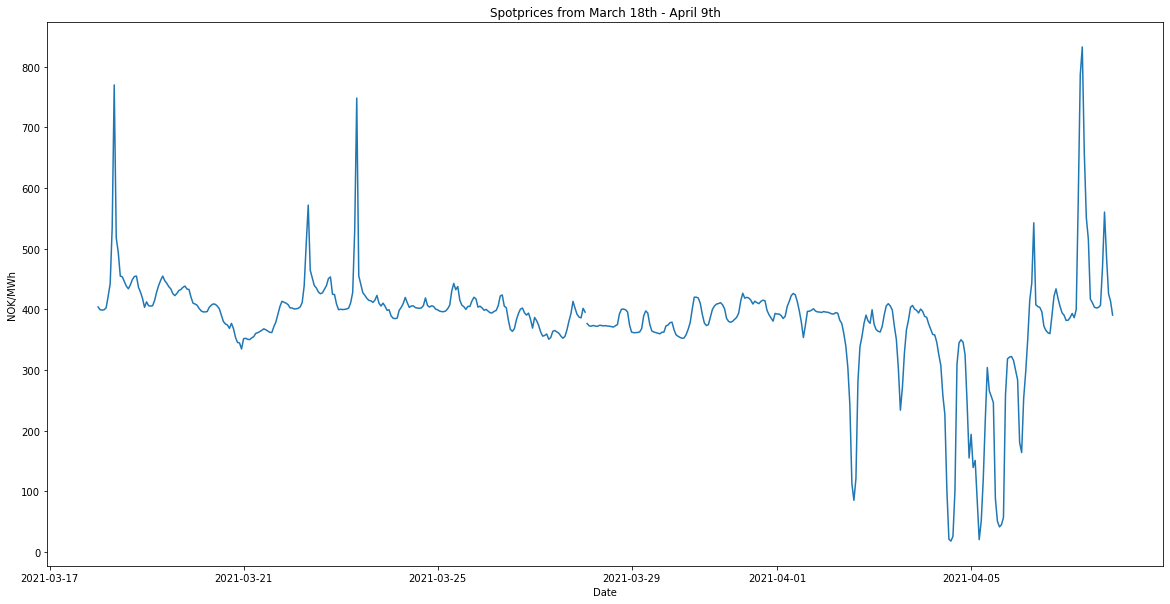

In [27]:
plt.figure(figsize =(20, 10))
plt.plot(spot_prices.price)
plt.title("Spotprices from March 18th - April 9th")
plt.xlabel("Date")
plt.ylabel("NOK/MWh")
plt.show()